<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/11/TensorFlowLogo.svg "TensorFlow")

                                                                                                           Source - Wikipedia

![image.png](attachment:image.png)

### Table of Content

1. [Deep Learning Basics](#section1)<br>
2. [Experiment with Components](#section2)<br>

<a id=section1></a>

# Deep Learning Basics

* This notebook is intended to give you a __thorough insight into training deep learning models.__
* You will also get to know __how different hyperparameters are changed__ and __how they affect the model.__

## 1. Import the Libraries

In [0]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Set Random Seed for Reproducibility

In [0]:
np.random.seed(2017)

## 3. Load MNIST

Keras provides very __convenient means of loading the dataset__ as well as doing the __data slicing__ as shown below.

Note - It is customary to name the attributes X (matrix) in upper-case and the label y (vector) in lower-case.

In [0]:
from tensorflow.keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print ("Number of training samples: %d"%train_features.shape[0])
print ("Number of test samples: %d"%test_features.shape[0])
print ("Image rows: %d"%train_features.shape[1])
print ("Image columns: %d"%train_features.shape[2])
print ("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


## 4. Show Examples from Each Class

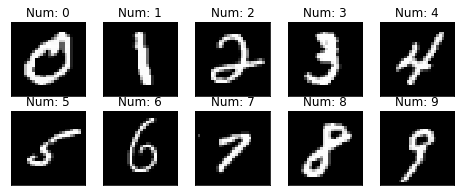

In [0]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

## 5. Pre-processing

In [0]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

## 6. Define Neural Network Model

In [0]:
def simple_nn():
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    # add activation layer to add non-linearity
    model.add(Activation('sigmoid'))
    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(num_classes))
    # add softmax layer 
    model.add(Activation('softmax'))
    return model

Check the model summary - 

In [0]:
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 7. Train the Model

In [0]:
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=2, validation_split=0.2)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0319 - acc: 0.8300 - val_loss: 0.0297 - val_acc: 0.8477
Epoch 2/10
 - 1s - loss: 0.0302 - acc: 0.8384 - val_loss: 0.0282 - val_acc: 0.8536
Epoch 3/10
 - 2s - loss: 0.0288 - acc: 0.8458 - val_loss: 0.0269 - val_acc: 0.8601
Epoch 4/10
 - 1s - loss: 0.0276 - acc: 0.8519 - val_loss: 0.0259 - val_acc: 0.8656
Epoch 5/10
 - 1s - loss: 0.0265 - acc: 0.8565 - val_loss: 0.0249 - val_acc: 0.8689
Epoch 6/10
 - 1s - loss: 0.0256 - acc: 0.8615 - val_loss: 0.0241 - val_acc: 0.8726
Epoch 7/10
 - 1s - loss: 0.0247 - acc: 0.8660 - val_loss: 0.0234 - val_acc: 0.8758
Epoch 8/10
 - 1s - loss: 0.0240 - acc: 0.8697 - val_loss: 0.0228 - val_acc: 0.8783
Epoch 9/10
 - 1s - loss: 0.0233 - acc: 0.8728 - val_loss: 0.0222 - val_acc: 0.8812
Epoch 10/10
 - 1s - loss: 0.0227 - acc: 0.8758 - val_loss: 0.0217 - val_acc: 0.8824
Model took 13.48 seconds to train


## 8. Plot Accuracy and Loss

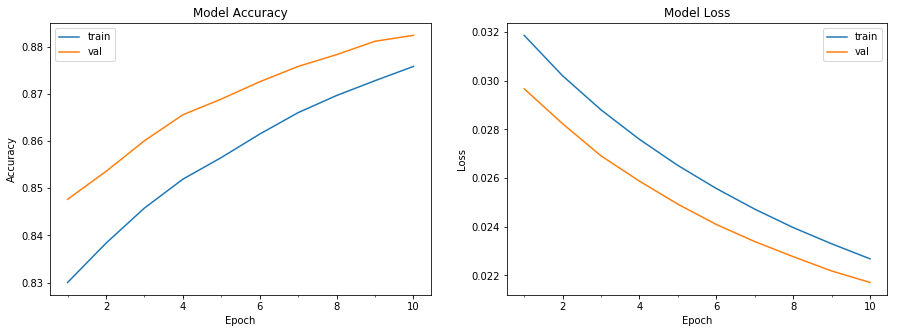

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

<a id=section2></a>

# Experiment with Components

![image.png](attachment:image.png)

## 1. Original Model Testing

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 87.95


### Observation - 
* Both __training and validation accuracy increase as the number of epochs increase.__ 
* More information is learned in each epoch.

## 2. Vary the Learning Rate

### Decrease the learning rate - 

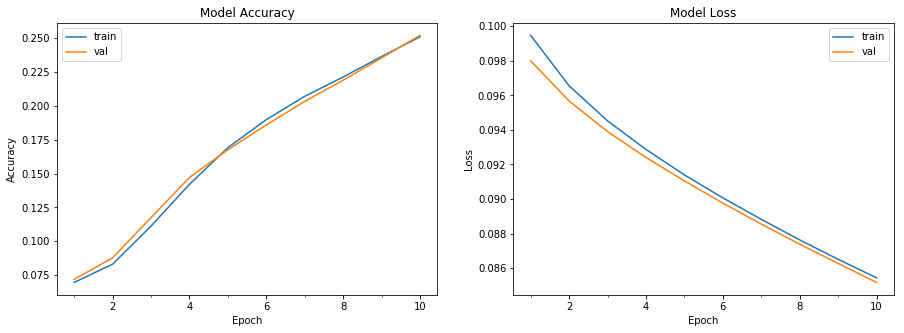

Model took 13.26 seconds to train
Accuracy on test data is: 26.57


In [0]:
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Increase the learning rate -

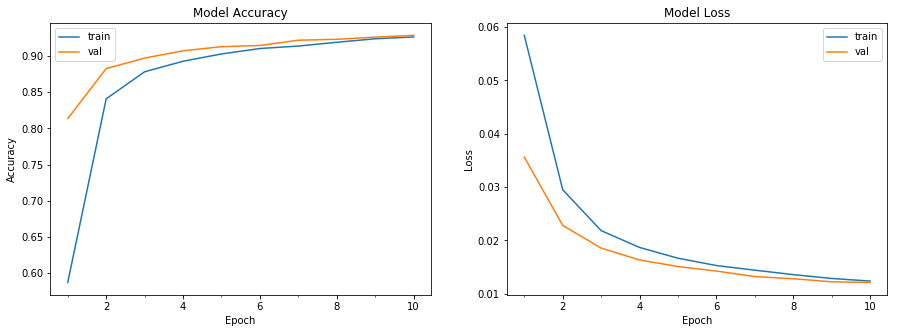

Model took 14.22 seconds to train
Accuracy on test data is: 92.37


In [0]:
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Observation - 
* If the __learning rate is decreased__, __less information is learned__ in each epoch and __more epochs are required to learn a good model.__ 
* If the __learning rate is increased, more information is learned__ in each epoch and __less epochs are required to learn a good model.__

## 3. Use Adam Optimizer instead of SGD

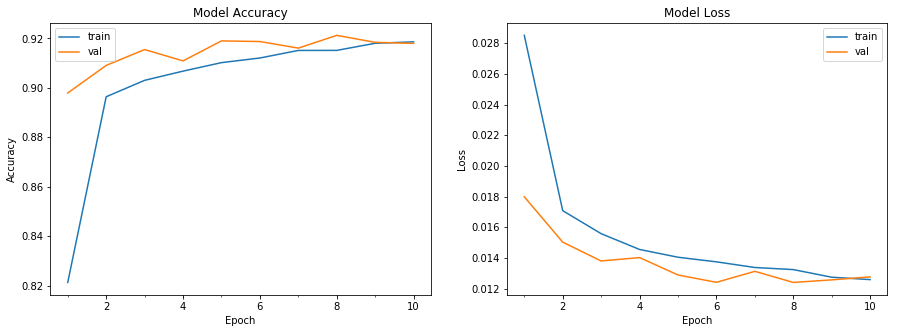

Model took 16.92 seconds to train
Accuracy on test data is: 91.46


In [0]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Observation - 
Using Adam optimizer, we __don’t need to specify a learning rate. However, the training time increases.__

## 4. Vary the Batch Size

### Batch Size - 32

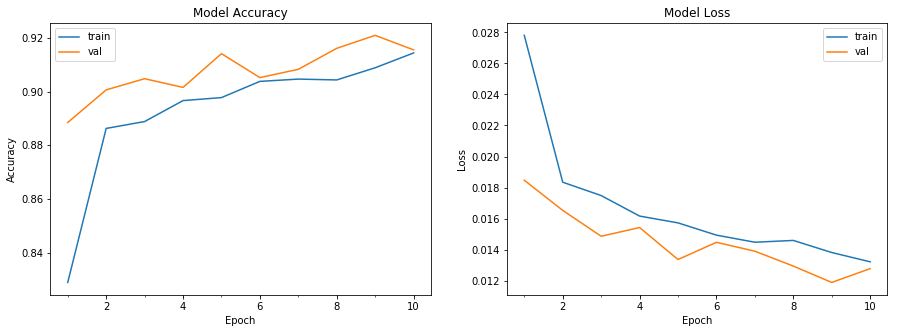

Model took 30.60 seconds to train
Accuracy on test data is: 91.68


In [0]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=32, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Observation - 
Decreasing the batch size __increases the training time while increasing the rate of learning.__

### Batch Size - 128

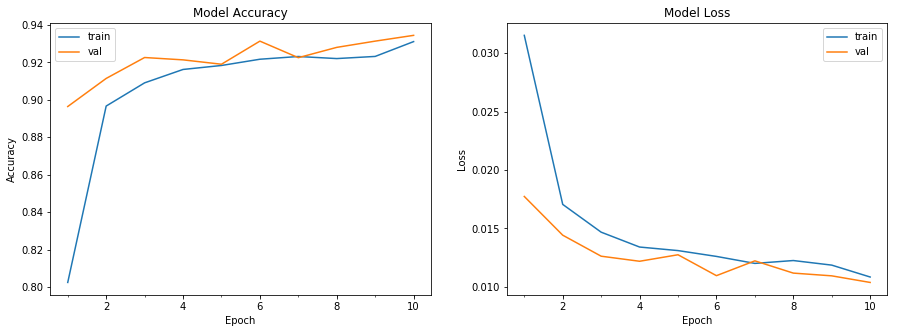

Model took 11.25 seconds to train
Accuracy on test data is: 93.31


In [0]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Observation - 
Increasing the batch size __decreases the training time but reduces the rate of learning.__

## 5. Cost Function as Categorical Crossentropy

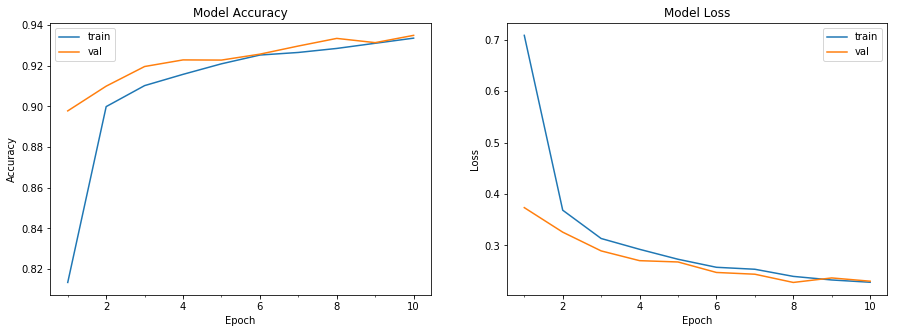

Model took 11.97 seconds to train
Accuracy on test data is: 93.41


In [0]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Observation - 
* Changing the cost function to categorical crossentropy __reduced the training time.__ 
* The decrease in training time is significant when using SGD for this experiment.

## 6. Increase the Number of Epochs

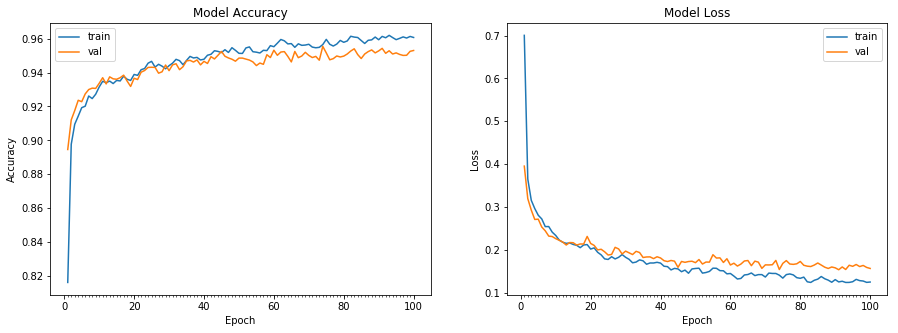

Model took 111.23 seconds to train
Accuracy on test data is: 95.55


In [0]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Observation - 
* As the number of epochs increase, more information is learned. 
* The __training as well as validation accuracy increases and then stabilizes.__

## 7. Deep Neural Network

In [0]:
def deep_nn():
    # Define a deep neural network
    model = Sequential()
    model.add(Dense(512, input_dim=num_input_nodes))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

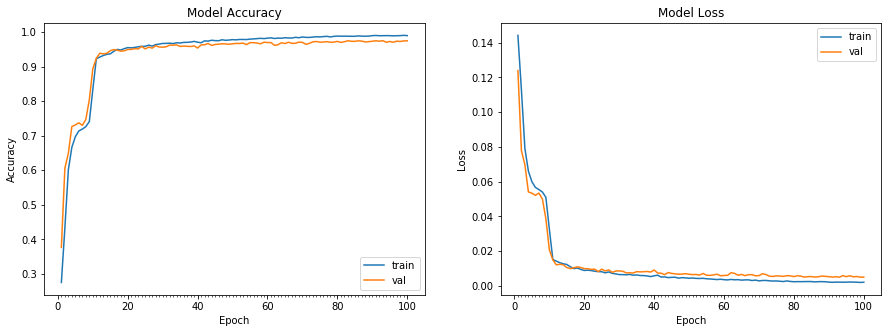

Model took 421.00 seconds to train
Accuracy on test data is: 97.54


In [0]:
model = deep_nn()
# Define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Observation - 
* By adding more hidden layers, __training time as well as information learned in each epoch increases.__ 
* It helps to improve the performance for complex tasks but __may not help significantly for relatively simple datasets such as MNIST.__

## 8. Save Model

Specify the directory to save the model - 

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# define a deep neural network
model = deep_nn()
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"

Checkpoint the model and save after every 10th epoch - 

In [0]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=True, \
                             mode='auto', period=10)
callbacks_list = [checkpoint]
# train the model
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=80, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

c:\users\gdev\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.



Epoch 00010: saving model to ./output-mnist/weights-10-0.84.hdf5

Epoch 00020: saving model to ./output-mnist/weights-20-0.94.hdf5

Epoch 00030: saving model to ./output-mnist/weights-30-0.96.hdf5

Epoch 00040: saving model to ./output-mnist/weights-40-0.97.hdf5

Epoch 00050: saving model to ./output-mnist/weights-50-0.96.hdf5

Epoch 00060: saving model to ./output-mnist/weights-60-0.97.hdf5

Epoch 00070: saving model to ./output-mnist/weights-70-0.97.hdf5

Epoch 00080: saving model to ./output-mnist/weights-80-0.97.hdf5
Accuracy on test data is: 96.97


## 9. Resume Training by Loading a Saved Model

* When __training big models, it is often convenient to break training into steps.__ (Here we load model after epoch 80)
* Train when you are not working, work when not training.

In [0]:
# define model
model = deep_nn()
# load weights
import os, glob
epoch_num = 80
outputFolder = './output-mnist'
file_ini = outputFolder+'/weights-'+ str(epoch_num)+'*'
filename =  glob.glob(file_ini)
if os.path.isfile(filename[0]):
    model.load_weights(filename[0])
else:
    print ("%s does not exist"%filename[0])
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"

Resume training, save model again for training later - 

In [0]:
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=True,\
                             mode='auto', period=10)
callbacks_list = [checkpoint]
# train the model
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2, initial_epoch = epoch_num+1)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


Epoch 00091: saving model to ./output-mnist/weights-91-0.97.hdf5


## 10. Early Stopping

* Early stopping helps as a form of regularization, __stopping training before validation loss starts increasing.__
* We define a term __patience in stopping as the no. of epochs to wait before termination__, even when loss increases, since it may decrease later.

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
#define model
model = deep_nn()
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))